In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_fake = pd.read_csv("datatest/fake.csv")
df_true = pd.read_csv("datatest/real.csv")

In [3]:
df_fake

,title,body,type,W/D/Y,url,main url
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com
...,...,...,...,...,...,...
496,ผลิตภัณฑ์ OVISURE GOLD บรรเทาอาการปวดข้อ ปวดไห...,💥 บอกลาอาการปวดข้อ ปวดเข่า เหน็บชาตามแขนขา ด้ว...,สุขภาพ,20/03/67,https://fb.watch/rW70U4Ie-w/,https://fb.watch
497,แตงโมต้มผสมกับน้ำตาล ดื่มรักษาโรคไต,กรมอนามัย กระทรวงสาธารณสุข เตือนคนไทยที่ได้รับ...,สุขภาพ,19/03/67,https://www.thaihealth.or.th/%E0%B9%81%E0%B8%9...,https://www.thaihealth.or.th
498,เมื่อท้องเสีย ต้องกินยาหยุดถ่าย เพื่อช่วยฆ่าเชื้อ,ไม่ต้องสงสัยเลย นี่คือเหตุการณ์ที่สั่นสะเทือนโ...,สุขภาพ,19/03/67,https://www.facebook.com/jingjungfootball/post...,https://www.facebook.com
499,หลีกเลี่ยงรับประทานปูที่มีรู เพราะมีการฉีดสารฟ...,กรมอนามัยเตือน ข่าวปลอม กับกระแสหลีกเลี่ยงทานป...,การเมือง,18/03/67,https://www.facebook.com/springnewsonline/post...,https://www.facebook.com


In [4]:
df_true

,title,body,summary,type,W/D/Y,url,main url
0,กมธ. ถกร่าง พ.ร.บ.สมรสเท่าเทียม โค้งสุดท้าย\n ...,“รัดเกล้า” แจง กมธ.ประชุมกลั่นกรองร่าง พ.ร.บ.ส...,สำหรับขั้นตอนสุดท้าย คือการมอบหมายให้ฝ่ายเลขาน...,การเมือง,14/03/67,https://www.thairath.co.th/news/politic/2770315,https://www.thairath.co.th
1,"คืบหน้าแก้หนี้นอกระบบ ไกล่เกลี่ยสำเร็จ 21,249\...",ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล...,ซึ่งเจ้าหนี้และลูกหนี้ได้มาพบปะพูดคุยกัน โดยมี...,การเมือง,13/03/67,https://www.thairath.co.th/news/politic/2770309,https://www.thairath.co.th
2,สส.เพื่อไทย ชี้เหตุผล “เศรษฐา” เป็นเซลส์แมน\nป...,ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล...,นายณณัฏฐ์ ระบุต่อไปว่า “อยากให้คนไทยมองเห็นควา...,การเมือง,13/03/67,https://www.thairath.co.th/news/politic/2770295,https://www.thairath.co.th
3,อภิสิทธิ์ ไม่หวั่นสุเทพตั้งพรรคหนุนประยุทธ์\n ...,จะไม่เป็นนักการเมืองอีกแล้ว21 ก.พ.2561 จากกรณี...,ณัฐวุฒิ แนะจับตา เชน-ธานี-เอกนัฏ ซบพรรค วิทยา ...,การเมือง,24/02/63,https://prachatai.com/journal/2018/02/75549,https://prachatai.com
4,2 ป. “แยกกันเดิน” แต่ถูกจับ “ตีรวมกัน”,เปิดศักราชปี 2566 ด้วยการประกาศ “แยกทาง-แยกพรร...,\n\nท้ายที่สุดพรรค พปชร. ที่เคยเป็นพรรค 116 เส...,การเมือง,14/05/66,https://www.bbc.com/thai/articles/cye6kzljz8go,https://www.bbc.com
...,...,...,...,...,...,...,...
2996,อย. รับรองฟ้าทะลายโจร เข้าบัญชียาหลักแห่งชาติ ...,พญ.อัมพร เบญจพลพิทักษ์ อธิบดีกรมการแพทย์แผนไทย...,ต้นฟ้าทะลายโจร\r\n“เราไม่ได้ต้องการให้เชื่อมั่...,สุขภาพ,12/09/63,https://thaipublica.org/2021/08/andrographis-p...,https://thaipublica.org
2997,16 ก.ย.นี้ แอปเป๋าตังเปิดให้ ปชช.กลุ่มเสี่ยงรั...,สปสช. เร่งเตรียมความพร้อมกระจาย ATK ฟรี 8.5 ล้...,ทั้งนี้ ทีมพัฒนาระบบของธนาคารกรุงไทย ได้เริ่มว...,การเมือง,11/09/63,https://www.nhso.go.th/news/3266,https://www.nhso.go.th
2998,กทม. เตรียมฉีดวัคซีนไฟเซอร์ เข็มแรกให้กับนักเร...,กลุ่มนักเรียน อายุ 12-18 ปี เป็นหนึ่งในกลุ่มที...,กลุ่มเด็กนักเรียนที่นายอนุทิน เผยตัวเลขวันนี้เ...,สุขภาพ,09/09/63,https://www.bbc.com/thai/thailand-58535260,https://www.bbc.com
2999,เปิดลงทะเบียนฉีดวัคซีนโควิด-19 สำหรับผู้ประกอบ...,มาคมภัตตาคารไทย เปิดลงทะเบียนออนไลน์ ฉีดวัคซีน...,การฉีดวัคซีนโควิด 19 ได้รับจัดสรรจากกระทรวงสาธ...,การเมือง,07/09/63,https://www.pptvhd36.com/news/%E0%B8%AA%E0%B8%...,https://www.pptvhd36.com


In [5]:
df_fake.columns

Index(['title', 'body', 'type', 'W/D/Y', 'url', 'main url'], dtype='object')

In [6]:
df_fake["class"] = 'fake'
df_true["class"] = 'real'

In [7]:
# pd.concat(): ใช้เพื่อรวม DataFrame ข่าวปลอมและ DataFrame ข่าวจริงเข้าด้วยกัน โดยกำหนดพารามิเตอร์ axis=0 เพื่อรวมตามแนวแถว (แนวดิ่ง) เพื่อให้ข้อมูลข่าวปลอมและข่าวจริงเรียงต่อกันใน DataFrame เดียว
df_manual_testing = pd.concat([df_fake,df_true], axis = 0)

In [8]:
df_manual_testing

,title,body,type,W/D/Y,url,main url,class,summary,main url
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,28/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,fake,NaN,NaN
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,28/04/67,https://www.topnews.co.th/news/953843?fbclid=I...,https://www.topnews.co.th,fake,NaN,NaN
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,fake,NaN,NaN
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,02/05/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,fake,NaN,NaN
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,26/04/67,https://www.facebook.com/groups/93837253660692...,https://www.facebook.com,fake,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2996,อย. รับรองฟ้าทะลายโจร เข้าบัญชียาหลักแห่งชาติ ...,พญ.อัมพร เบญจพลพิทักษ์ อธิบดีกรมการแพทย์แผนไทย...,สุขภาพ,12/09/63,https://thaipublica.org/2021/08/andrographis-p...,NaN,real,ต้นฟ้าทะลายโจร\r\n“เราไม่ได้ต้องการให้เชื่อมั่...,https://thaipublica.org
2997,16 ก.ย.นี้ แอปเป๋าตังเปิดให้ ปชช.กลุ่มเสี่ยงรั...,สปสช. เร่งเตรียมความพร้อมกระจาย ATK ฟรี 8.5 ล้...,การเมือง,11/09/63,https://www.nhso.go.th/news/3266,NaN,real,ทั้งนี้ ทีมพัฒนาระบบของธนาคารกรุงไทย ได้เริ่มว...,https://www.nhso.go.th
2998,กทม. เตรียมฉีดวัคซีนไฟเซอร์ เข็มแรกให้กับนักเร...,กลุ่มนักเรียน อายุ 12-18 ปี เป็นหนึ่งในกลุ่มที...,สุขภาพ,09/09/63,https://www.bbc.com/thai/thailand-58535260,NaN,real,กลุ่มเด็กนักเรียนที่นายอนุทิน เผยตัวเลขวันนี้เ...,https://www.bbc.com
2999,เปิดลงทะเบียนฉีดวัคซีนโควิด-19 สำหรับผู้ประกอบ...,มาคมภัตตาคารไทย เปิดลงทะเบียนออนไลน์ ฉีดวัคซีน...,การเมือง,07/09/63,https://www.pptvhd36.com/news/%E0%B8%AA%E0%B8%...,NaN,real,การฉีดวัคซีนโควิด 19 ได้รับจัดสรรจากกระทรวงสาธ...,https://www.pptvhd36.com


In [9]:
df_merge = pd.concat([df_fake, df_true], axis =0 )

In [10]:
df_merge.columns

Index(['title', 'body', 'type', 'W/D/Y', 'url', 'main url', 'class', 'summary',
       'main url '],
      dtype='object')

In [11]:
df_drop=df_merge.drop(["W/D/Y","url","main url ","main url","summary"], axis = 1)

In [12]:
df_drop

,title,body,type,class
0,นายทักษิณขยับ เรือนจำผวา,[นายทักษิณขยับเรือนจำผวา]\n.\nสื่อหลายสำนักพาด...,การเมือง,fake
1,“พล.ต.อ.เสรีพิศุทธ์” ฟันธง “บิ๊กโจ๊ก” ชนะปมออก...,"""พล.ต.อ.เสรีพิศุทธ์"" ฟันธง ""บิ๊กโจ๊ก"" ชนะปมออก...",การเมือง,fake
2,ขาดทุนยับประกาศปิดกิจการโละพนักงานทิ้ง,ได้ยินข่าวช่องว้ายทีวี ซึ่งมีทายาทของมหาเศรษฐี...,การเมือง,fake
3,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,คนเหนือบอกว่า คนไม่ดี เหยียบเมือง มันจะร้อนเเล...,การเมือง,fake
4,ก็เลือกมันมาแล้วเนาะ ทำไงได้ล่ะ ก้มหน้าก้มตาให...,เพื่อไทยเป็นรัฐบาล ค่าไฟ ค่าน้ำมัน ค่าแกส ลดทั...,การเมือง,fake
...,...,...,...,...
2996,อย. รับรองฟ้าทะลายโจร เข้าบัญชียาหลักแห่งชาติ ...,พญ.อัมพร เบญจพลพิทักษ์ อธิบดีกรมการแพทย์แผนไทย...,สุขภาพ,real
2997,16 ก.ย.นี้ แอปเป๋าตังเปิดให้ ปชช.กลุ่มเสี่ยงรั...,สปสช. เร่งเตรียมความพร้อมกระจาย ATK ฟรี 8.5 ล้...,การเมือง,real
2998,กทม. เตรียมฉีดวัคซีนไฟเซอร์ เข็มแรกให้กับนักเร...,กลุ่มนักเรียน อายุ 12-18 ปี เป็นหนึ่งในกลุ่มที...,สุขภาพ,real
2999,เปิดลงทะเบียนฉีดวัคซีนโควิด-19 สำหรับผู้ประกอบ...,มาคมภัตตาคารไทย เปิดลงทะเบียนออนไลน์ ฉีดวัคซีน...,การเมือง,real


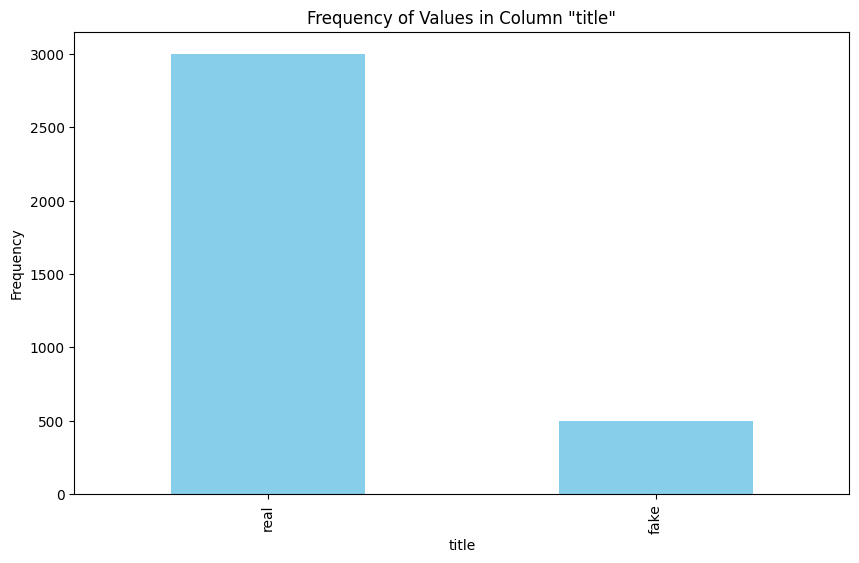

In [13]:
# Function to plot bar chart for column frequencies
def plot_column_frequency(column_name):
    # Count the frequency of each value in the specified column
    value_counts = df_drop["class"].value_counts()

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    value_counts.plot(kind='bar', color='skyblue')
    
    # Set labels and title
    plt.xlabel("title")
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Values in Column "{"title"}"')
    
    # Show plot
    plt.show()

# # Plot frequency of values in each column
columns_to_plot = ['type']
for column in columns_to_plot:
    plot_column_frequency(column)

In [14]:
# Count the frequency of each type
type_counts = df_drop['type'].value_counts()
type_counts

type
ทั่วไป                            1220
การเมือง                          1091
เศรษฐกิจ                           532
สุขภาพ                             528
การศึกษา                            66
ทั่่วไป                             17
สุุขภาพ                             16
การเเมีอง                            4
 \n         \nเศรษฐกิจ\n             4
ทั่ั่วไป                             3
 เศรษฐกิจ                            3
ทั้วไป                               3
ที่วไป                               2
เศษฐกิจ                              2
การแพทย์                             2
สังคม                                1
ข่าวการเมือง                         1
การคึกษา                             1
การแพทย์์                            1
สุขการ                               1
 \r\n \t\r\nเศรษฐกิจ\r\n             1
การแพรทย์                            1
 \r\n         \r\nเศรษฐกิจ\r\n       1
DC                                   1
Name: count, dtype: int64

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib

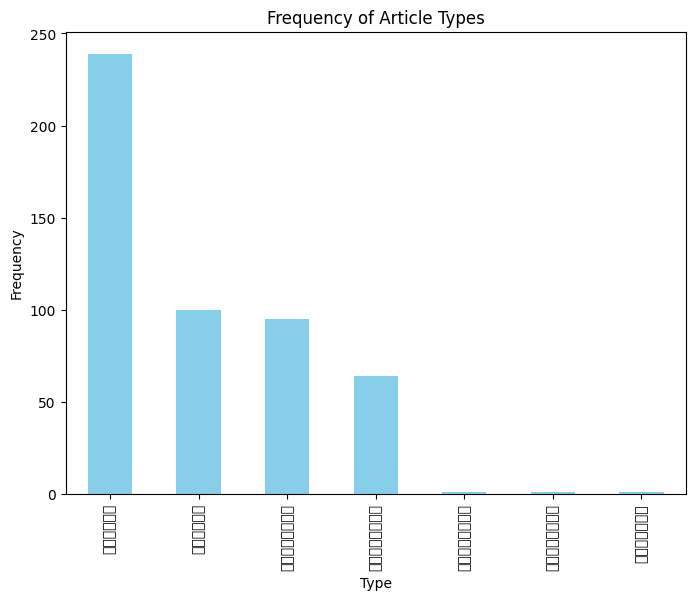

Number of unique types: 24


In [15]:
# Count the frequency of each type
type_counts = df_fake['type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
type_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency of Article Types')

# Show plot
plt.show()

# Count the number of unique types
num_unique_types = df_drop['type'].nunique()

# Print the number of unique types
print(f"Number of unique types: {num_unique_types}")

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib

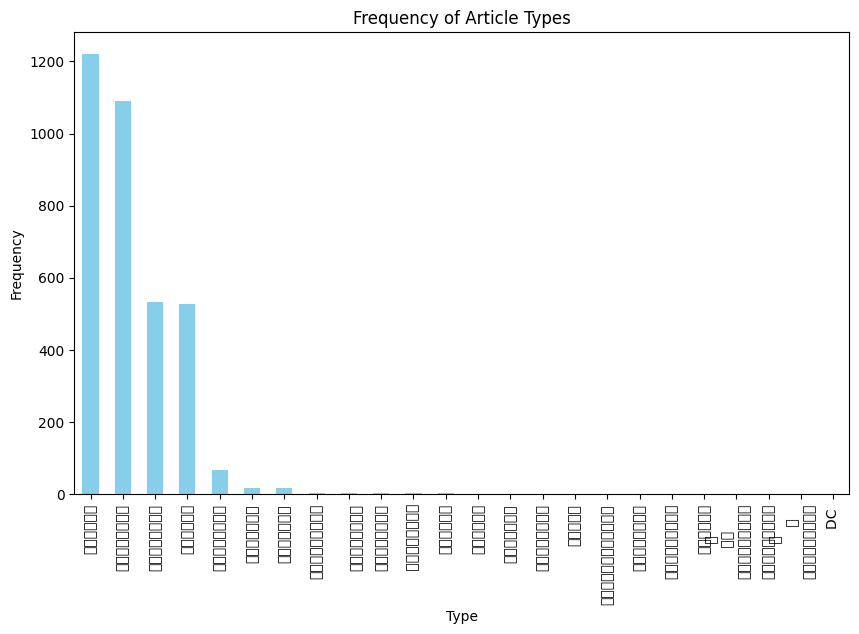

In [16]:

# Count the frequency of each type
type_counts = df_drop['type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
type_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency of Article Types')

# Show plot
plt.show()
